In [37]:
%matplotlib notebook

import numpy

import matplotlib.pyplot as pyplot
import seaborn as sns
sns.set(color_codes=True)

In [48]:
L = 20
N_pts = 100

In [49]:
x = numpy.linspace(-L/2., L/2., num=N_pts)
U = -numpy.absolute(1. / x)
print(numpy.sum(numpy.isinf(U)))

0


<IPython.core.display.Javascript object>


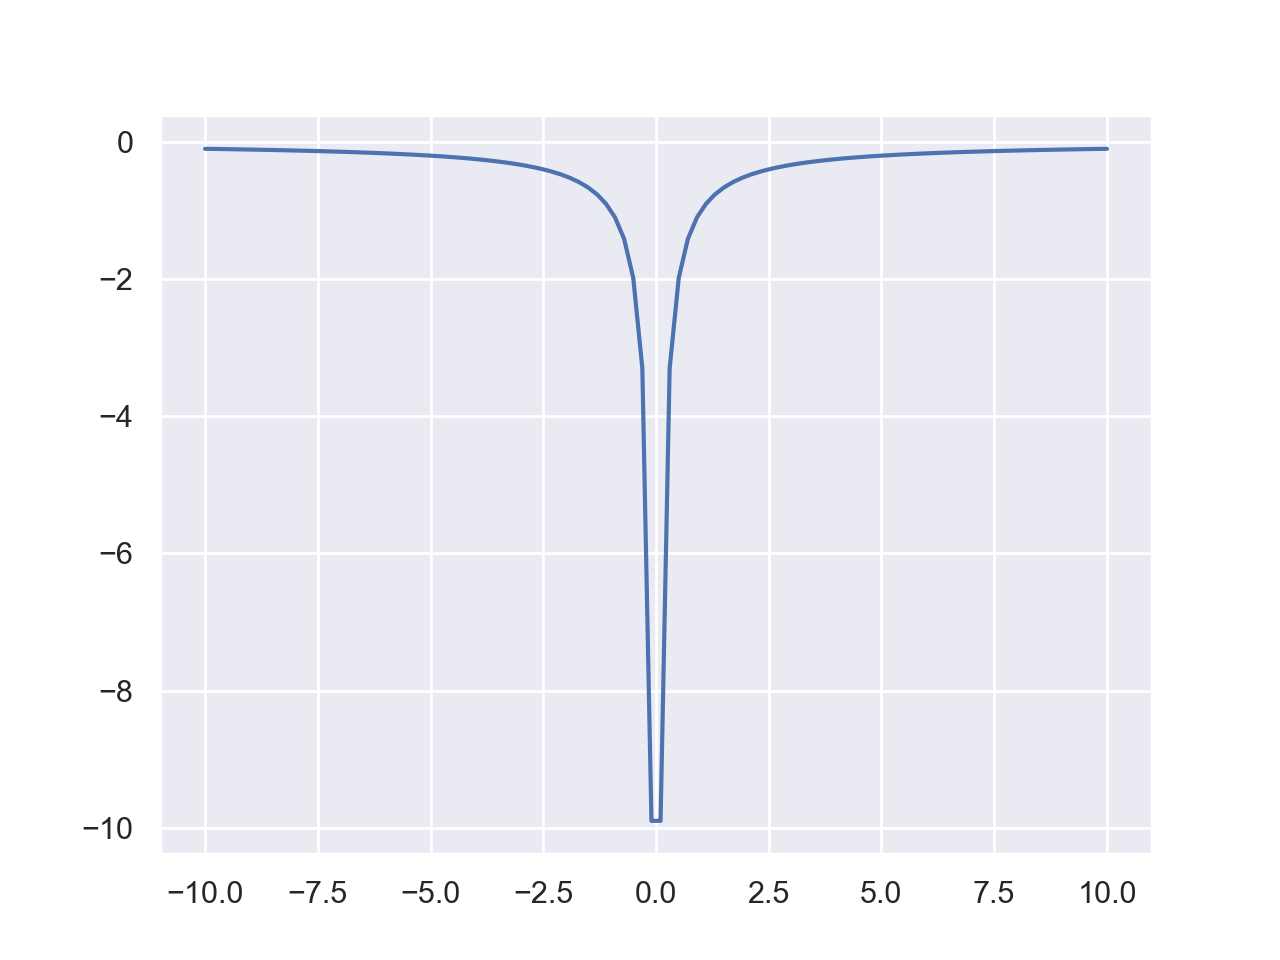

In [50]:
pyplot.figure(0)
pyplot.plot(x,U)

<IPython.core.display.Javascript object>


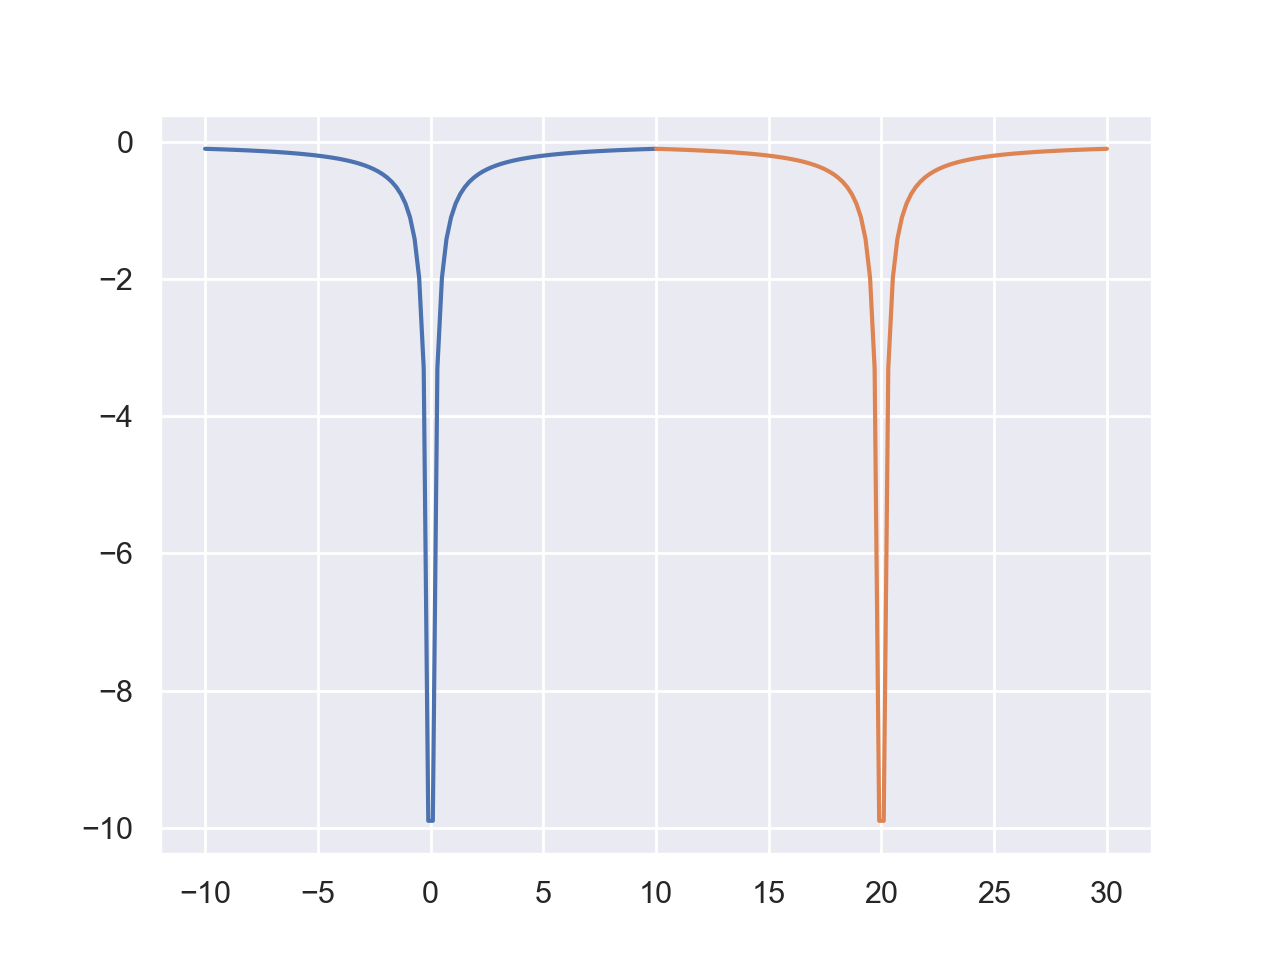

<IPython.core.display.Javascript object>


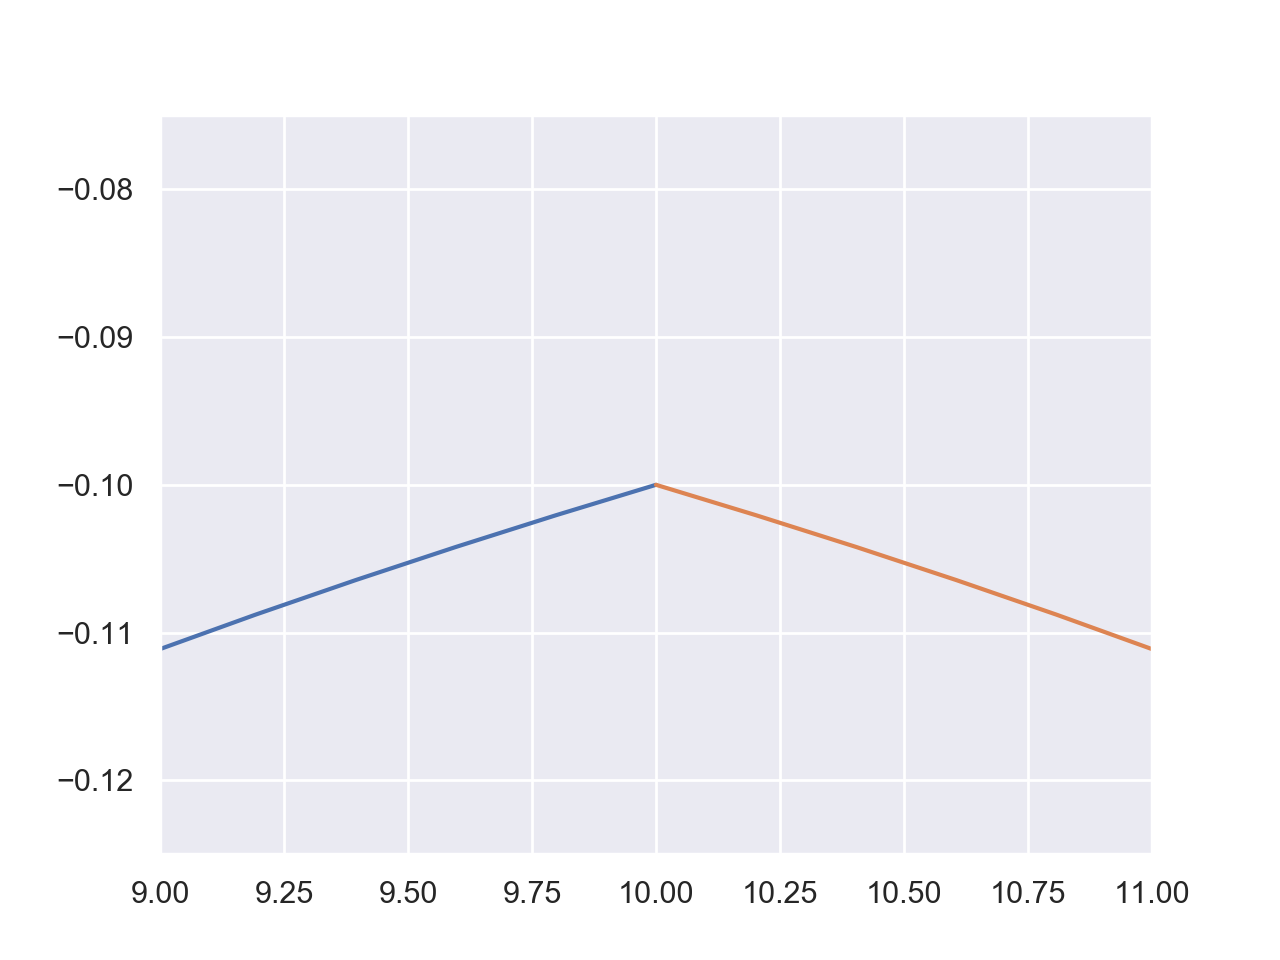

(9, 11)

In [51]:
# display 2 adjacent to each other
pyplot.figure(1)
pyplot.plot(x, U)
pyplot.plot(x + L, U)

pyplot.figure(2)
pyplot.plot(x, U)
pyplot.plot(x + L, U)
pyplot.ylim((-.125, -0.075))
pyplot.xlim((9,11))

In [61]:
x2 = numpy.linspace(-1.5*L, 1.5*L, num=N_pts*3)
U2 = numpy.zeros(x2.shape)
for i in range(-1,2):
    loc = i * L
    print(i, loc)
    U2 += -numpy.absolute(1. / (x2 - loc))

print(U2[:3])

-1 -20
0 0
1 20
[-0.15333333 -0.15568617 -0.15812833]


<IPython.core.display.Javascript object>


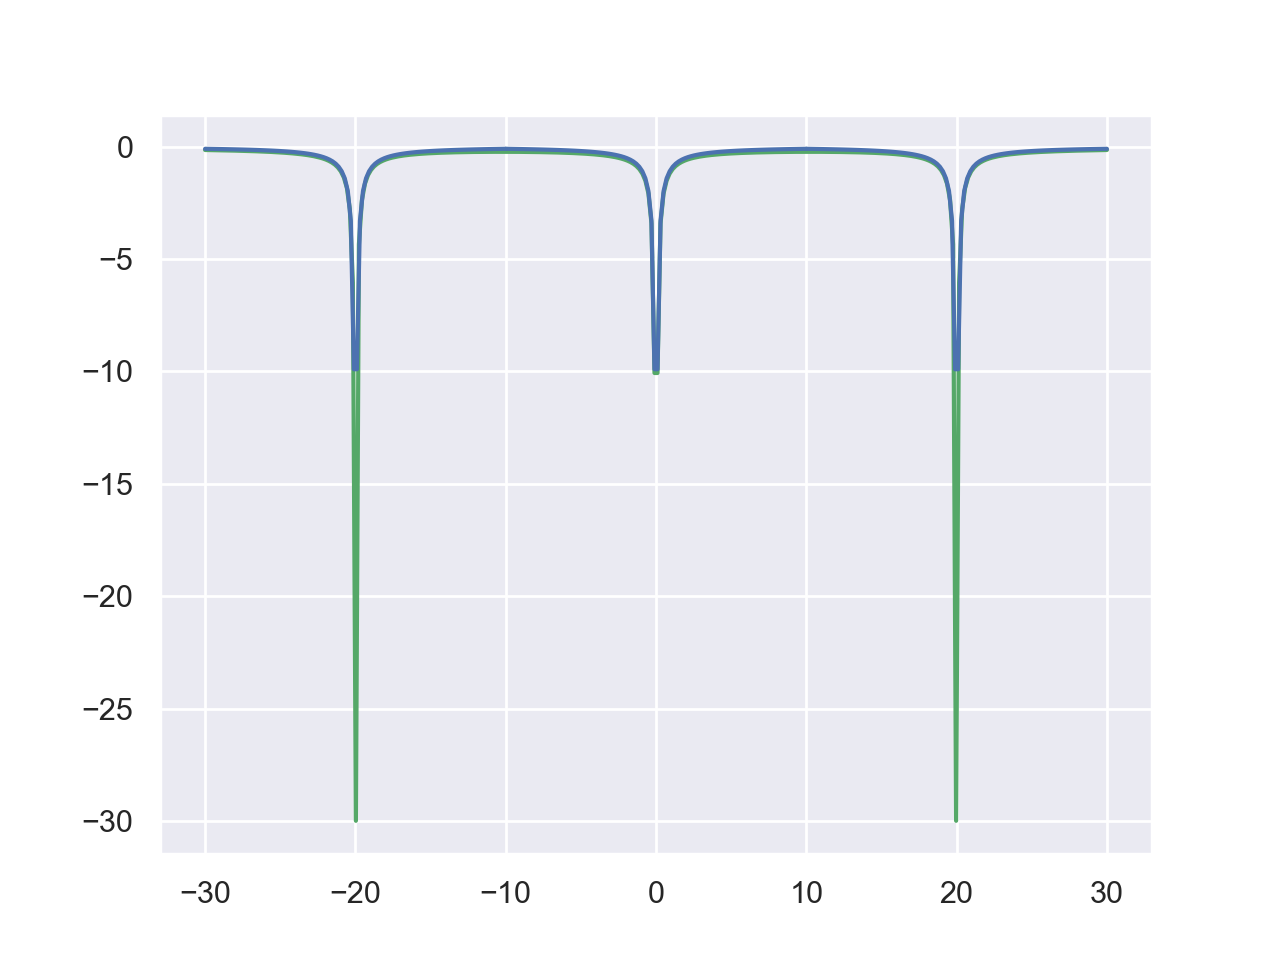

<IPython.core.display.Javascript object>


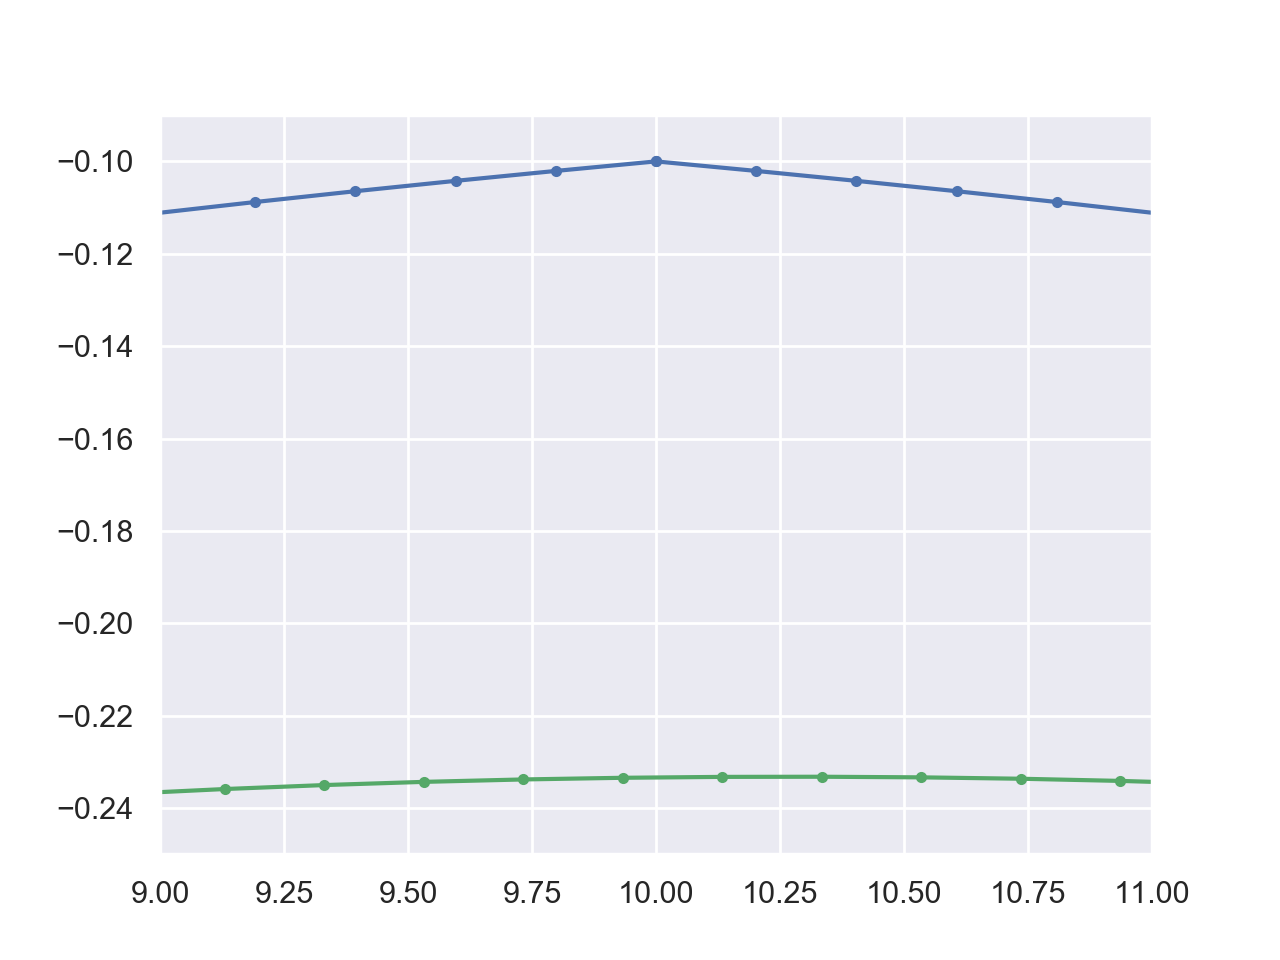

(-0.25, -0.09)

In [66]:
pyplot.figure(3)
pyplot.plot(x2, U2, 'g')
pyplot.plot(x,U, 'b')
pyplot.plot(x-L,U, 'b')
pyplot.plot(x+L,U, 'b')


pyplot.figure(4)
pyplot.plot(x,U, 'b.-')
pyplot.plot(x-L,U, 'b.-')
pyplot.plot(x+L,U, 'b.-')
pyplot.plot(x2, U2, 'g.-')
pyplot.xlim((9, 11))
pyplot.ylim((-.25, -.09))

[-0.1        -0.13333333 -0.15333333 -0.16761905 -0.17873016 -0.18782107
 -0.19551338 -0.20218004 -0.2080624  -0.21332555]


<IPython.core.display.Javascript object>


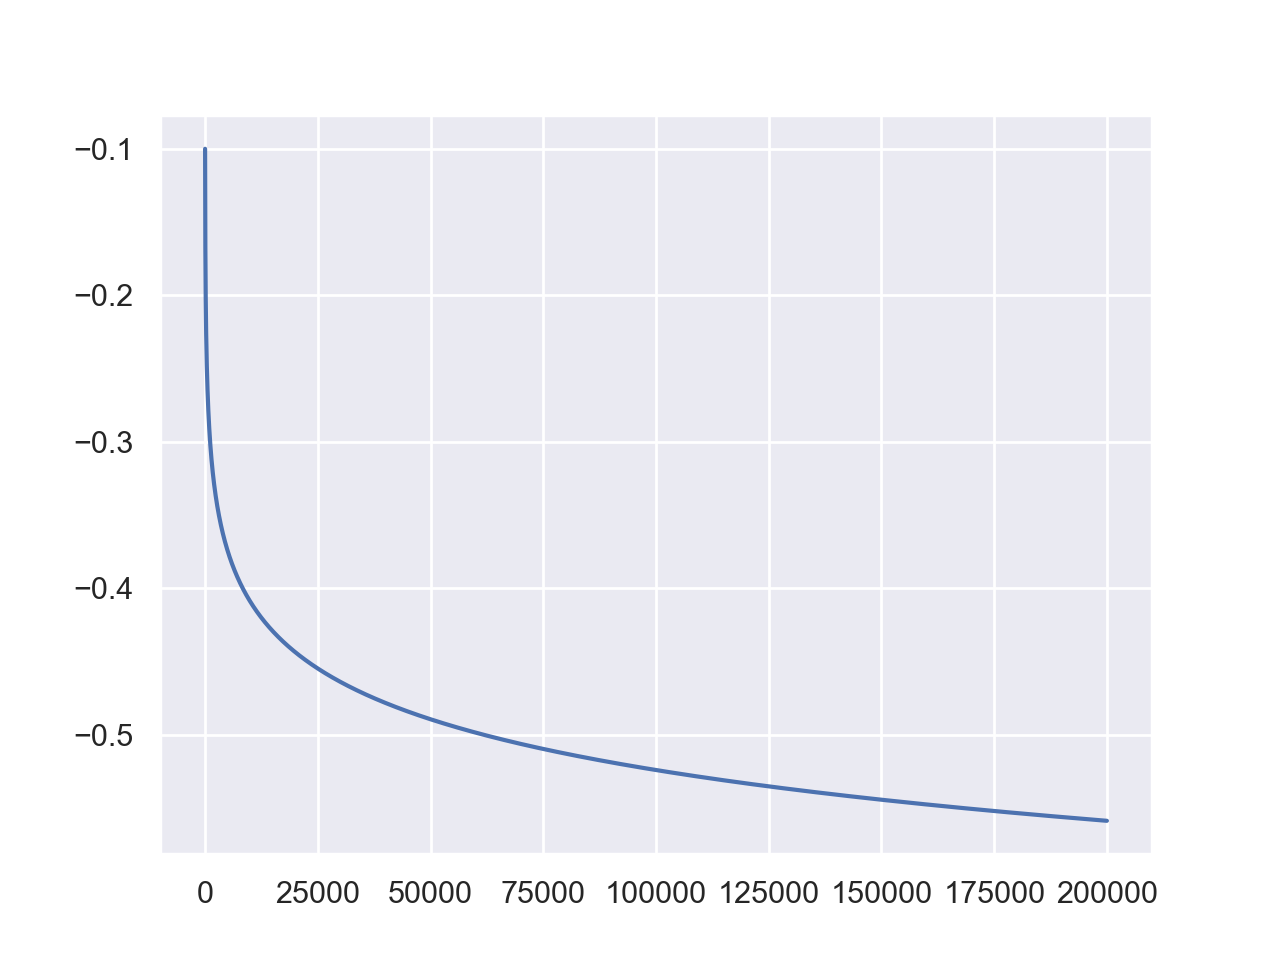

In [76]:
# sanity check - adding additional nuclei will not lead to convergence because sum(1/x) does not converge
n = 10000
nuclei_dists = numpy.array(range(n)) * L + L/2
t = -numpy.absolute(1. / nuclei_dists)
U_mid = numpy.cumsum(t)
print(U_mid[:10])

pyplot.figure(5)
pyplot.plot(nuclei_dists, U_mid)

## 1D periodic boundary condition, plane wave basis set expansion

region width is $L$, take region to be from $-L/2$ to $L/2$

### basis set defintion using periodic boundary condition constraint

plane wave solutions then meet this boundary condition:

$\phi(-L/2) = \phi(L/2)$

$e^{ik(-L/2)} = e^{ikL/2}$

$1 = e^{ikL}$

$e^ix$ is 1 when $x$ is an integer $n$ multiple of $2\pi$ therefore:

$kL = 2\pi n$

$k = \frac{2\pi n}{L}$

### basis set normalization constant

$$1 = \int_{-L/2}^{L/2}{dx\ \phi^*(x)\ \phi(x)}$$

$$1 = \int_{-L/2}^{L/2}{dx\ Ae^{-ix\frac{2\pi n}{L}}\ Ae^{ix\frac{2\pi n}{L}}}$$

$$1 = A^2 \int_{-L/2}^{L/2}{dx\ e^0}$$

$$1 = A^2 \Big[x\Big]_{-L/2}^{L/2}$$

$$1 = A^2 \Big[L/2 - (-L/2)\Big]$$

$$1 = A^2\ L$$

$$A = \frac{1}{\sqrt L}$$


### potential energy matrix element derivation

basis states are $k_1$, $k_2$  

$U_{k_1, k_2} = \int{dx\ e^{i k_1 x}\ U(x)\ e^{-i k_2 x}}$

$U_{k_1, k_2} = \int{dx\ e^{i(k_1 - k_2)x}\ U(x)}$

$U_{\Delta k} = \int{dx\ e^{i \Delta k\ x}\ U(x)}$

$\Delta k = k_1 - k_2$

#### deeper dive on what is $\Delta k$ - plugging in definition of k from above:

$\Delta k = \frac{2\pi n_1}{L} - \frac{2\pi n_2}{L}$

$\Delta k = \frac{2\pi}{L}(n_1 - n_2)$

$\Delta k = \frac{2\pi}{L} \Delta n$

#### potential energy including nearest neighbor

$U(x) = -\frac{1}{|x - L|} - \frac{1}{|x|} - \frac{1}{|x + L|}$

plugging in to the integral equation:

$$U_{\Delta k} = \int_{-L/2}^{L/2}{dx\ e^{i \Delta k\ x}\ \Big( -\frac{1}{|x - L|} - \frac{1}{|x|} - \frac{1}{|x + L|} \Big)}$$

can separate each of these potential energy terms in to separate integrals:

$U_{\Delta k} = -\int{dx\ e^{i \Delta k\ x}\ \Big( \frac{1}{|x - L|} \Big)} -\int{dx\ e^{i \Delta k\ x}\ \Big( \frac{1}{|x|} \Big)} -\int{dx\ e^{i \Delta k\ x}\ \Big( \frac{1}{|x + L|} \Big)} $

for the first integral, do a change of variable:  $x = x' + L$ and then $dx = dx'$.  For the purposes of the limits of integration $x' = x - L$ then the first integral becomes:

$$-\int_{-3L/2}^{-L/2}{dx' \ e^{i \Delta k\ (x' + L)}\ \Big( \frac{1}{|x' + L - L|} \Big)} = $$

$$-\int{dx' \ e^{i \Delta k\ (x' + L)}\ \Big( \frac{1}{|x'|} \Big)} = $$

$$-\int{dx' \ e^{i \Delta k\ x'}\ e^{i \Delta k\ L} \ \Big( \frac{1}{|x'|} \Big)} = $$

$$-e^{i \Delta k\ L} \int_{-3L/2}^{-L/2}{dx' \ e^{i \Delta k\ x'}\ \Big( \frac{1}{|x'|} \Big)} = $$

plugging in definition of $\Delta k$ from above into the term in front of the integral:

$e^{i \frac{2\pi}{L} \Delta n L} = e^{i2\pi \Delta n}$

Since $\Delta n$ is the difference between 2 integers, it is itself an integer, therefore:

$= 1$

Therefore the integral becomes:

$$-\int_{-3L/2}^{-L/2}{dx' \ e^{i \Delta k\ x'}\ \Big( \frac{1}{|x'|} \Big)}$$

The same logic can be applied to the integral of the term $\frac{-1}{|x + L|}$, yielding:

$$-\int_{L/2}^{3L/2}{dx' \ e^{i \Delta k\ x'}\ \Big( \frac{1}{|x'|} \Big)}$$

combining back together:

$$U_{\Delta k} = -\int_{-3L/2}^{-L/2}{dx' \ e^{i \Delta k\ x'}\ \Big( \frac{1}{|x'|} \Big)}  -\int_{-L/2}^{L/2}{dx\ e^{i \Delta k\ x}\ \Big( \frac{1}{|x|} \Big)} -\int_{L/2}^{3L/2}{dx' \ e^{i \Delta k\ x'}\ \Big( \frac{1}{|x'|} \Big)}$$

These are all the same integral just with different limits of integration that are adjacent to each other, therefore they can be combined:

$$U_{\Delta k} = -\int_{-3L/2}^{3L/2}{dx \ e^{i \Delta k\ x}\ \frac{1}{|x'|}} $$
